# Load Data and Dependencies

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


RANDOM_STATE = 1

train_data = pd.read_csv("data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
rows, cols = train_data.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 891
Number of columns: 12


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Cleaning

In [4]:
train_data_cleaned = train_data.copy()

## Duplicates

In [5]:
print("Duplicates records:", train_data.duplicated().sum())

Duplicates records: 0


There are no duplicated rows, so we can move on to the next step.

## Irrelevant Features

- `PassengerId`, `Ticket` are not needed as they are just identifiers and do not hold value for analysis and modeling.
- `Name` is not needed as this is personally-identifiable information.
- `Cabin` does not contain any values useable for analysis and modeling.

In [6]:
# Remove irrelevant features
cols_to_drop = ["PassengerId", "Name", "Ticket", "Cabin"]

train_data_cleaned.drop(columns=cols_to_drop, inplace=True)
train_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Data Type Issues

- `Pclass` should be converted from `int64` to `category` since its values are categorical
- `Sex` and `Embarked` would be better if converted to `category`

In [7]:
train_data_cleaned.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [8]:
# Convert columns to appropriate data types
train_data_cleaned[["Pclass", "Sex", "Embarked"]] = train_data_cleaned[["Pclass", "Sex", "Embarked"]].astype("category")

train_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(3), float64(2), int64(3)
memory usage: 37.9 KB


## Data Range Constraints

- `Fare` has 15 observations where the value is `0.0`, which indicates either their fare was not documented or they rode the Titanic for free. Inspecting these columns, we can see a pattern where all of these passengers were **males** who embarked from **Southampton (S)**, with no family members on board (`SibSp` and `Parch` are 0). This suggests that these individuals would likely be stowaways, thus we will retain all of these observations.
- All the other features look to have valid data ranges (no negatives and unusually high values).

In [9]:
train_data_cleaned.select_dtypes(include=["int", "float"]).agg(["min", "max"])

,Survived,Age,SibSp,Parch,Fare
min,0,0.42,0,0,0.0000
max,1,80.00,8,6,512.3292


In [10]:
train_data_cleaned.loc[train_data_cleaned["Fare"] == 0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
179,0,3,male,36.0,0,0,0.0,S
263,0,1,male,40.0,0,0,0.0,S
271,1,3,male,25.0,0,0,0.0,S
277,0,2,male,NaN,0,0,0.0,S
302,0,3,male,19.0,0,0,0.0,S
413,0,2,male,NaN,0,0,0.0,S
466,0,2,male,NaN,0,0,0.0,S
481,0,2,male,NaN,0,0,0.0,S
597,0,3,male,49.0,0,0,0.0,S
633,0,1,male,NaN,0,0,0.0,S


## Membership Constraints

- `Embarked` has invalid category (`NaN`), which represents missing values and should be resolved.

In [11]:
categorical_cols = train_data_cleaned.select_dtypes(include=["category"]).columns

for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(train_data_cleaned[col].unique())
    print()


Unique values in 'Pclass':
[3, 1, 2]
Categories (3, int64): [1, 2, 3]

Unique values in 'Sex':
['male', 'female']
Categories (2, object): ['female', 'male']

Unique values in 'Embarked':
['S', 'C', 'Q', NaN]
Categories (3, object): ['C', 'Q', 'S']



## Missing Values

In [12]:
train_data_cleaned.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

The following features contain missing data:

- `Age`: 177 missing
- `Embarked`: 2 missing

Since there are only 2 observations with missing values from the `Embarked` column, it is safe to drop these.

In [13]:
# Drop rows with missing values in `Embarked` column
train_data_cleaned.dropna(subset=["Embarked"], inplace=True)

# Check for missing values again
train_data_cleaned.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

For handling missing values in the `Age` column, it would be better to **impute** for them since there are **177** rows affected, and simply dropping them would lead to significant data loss. For this, we must first investigate the distribution of the data to guide in determining the optimal imputation method (**mean** or **median**).

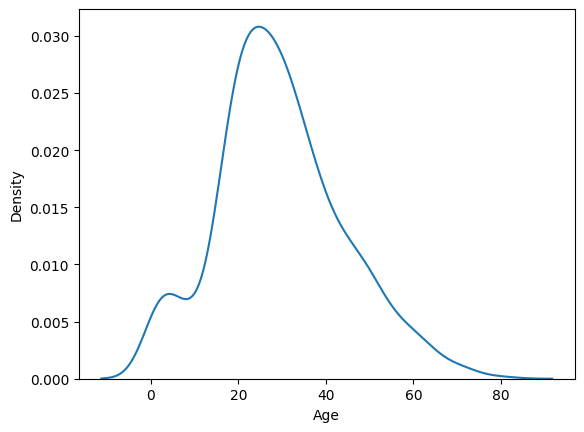

In [14]:
sns.kdeplot(data=train_data_cleaned, x="Age")
plt.show()

Since the `Age` column is slightly right-skewed, it would be better to use the **median** for imputation since it is less sensitive to skewed data and better represents the central tendency.

In [15]:
# Compute the median age and use it to fill missing values
median_age = train_data_cleaned["Age"].median()

train_data_cleaned["Age"] = train_data_cleaned["Age"].fillna(median_age)

# Check for missing values again
train_data_cleaned.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Outliers

We will use the Interquartile Range (IQR) method to detect outliers. This method flags data points as outliers if either:

- They lie **below** `Q1 - 1.5 × IQR`
- They lie **above** `Q3 + 1.5 × IQR`

where `Q1` and `Q3` are the first and third quartiles, respectively.

In [16]:
def detect_outliers(data, col):
    # Compute the first and third quartiles (25th and 75th percentiles)
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)

    # Compute the interquartile range (IQR)
    iqr = q3 - q1

    # Compute the lower and upper thresholds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify outliers
    return data[(data[col] < lower_bound) | (data[col] > upper_bound)]


# Detect outliers from numeric columns
num_cols = train_data_cleaned.select_dtypes(include=["int", "float"]).columns

# Count how many outliers in each column
for col in num_cols:
    num_outliers = len(detect_outliers(train_data_cleaned, col))
    print(f"Outliers in {col}: {num_outliers} found")

Outliers in Survived: 0 found
Outliers in Age: 65 found
Outliers in SibSp: 46 found
Outliers in Parch: 213 found
Outliers in Fare: 114 found


Outliers were found in the following columns:
- `Age`
- `SibSp`
- `Parch`
- `Fare`

Now, we will be sampling some observations from these features to determine if the outliers represent legitimate data points or may have been caused by data or technical errors.

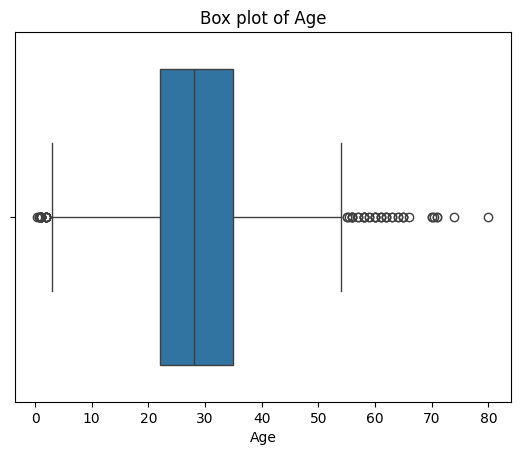

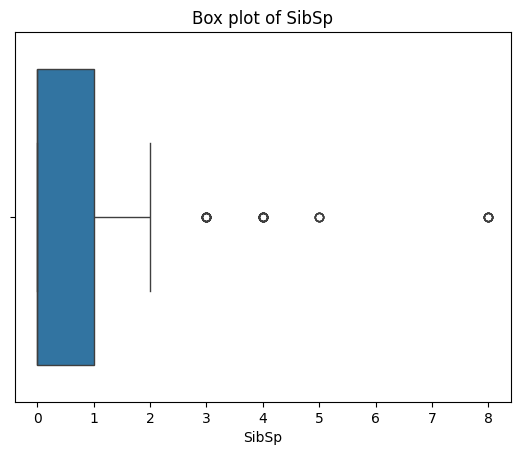

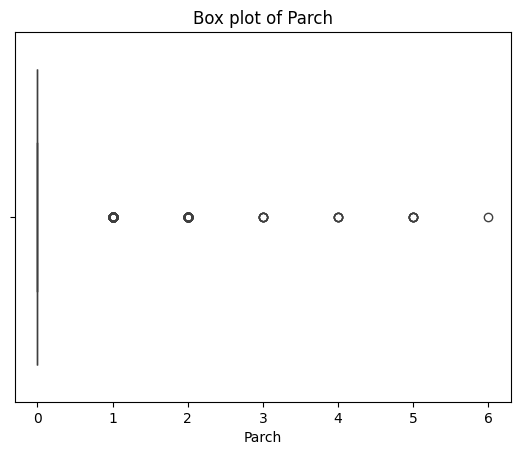

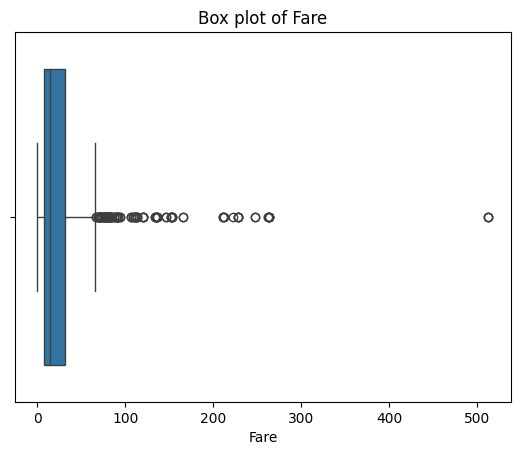

In [17]:
cols_with_outliers = ["Age", "SibSp", "Parch", "Fare"]

# Visualize how outliers are distributed using box plots
for col in cols_with_outliers:
    sns.boxplot(data=train_data_cleaned, x=col)
    plt.title(f"Box plot of {col}")
    plt.show()

In [18]:
train_data[train_data["Fare"] > 400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


**Findings:**

- `Age`: Outliers are present both exceeding the lower and upper thresholds. However, the outliers are still within the expected age range. Outliers in this column could just be a result of the data being concentrated in the 25-30 age range.
- `SibSp` and `Parch`: Outliers for these columns are only present exceeding the upper threshold. Outliers in this column could be a result of some passengers having more than the average number of family members aboard with them rather than data entry errors.
- `Fare`: Outliers are present exceed only exceeding the upper threshold. Notably, there are far-right outliers that have ticket fares exceeding 500. Upon closer inspection on these rows, considering they were all first class passengers (`Pclass == 1`), it seems they are valid data points and could be passengers booked on the most expensive cabins.

**Verdict:**

- Upon investigation, although outliers were detected, all of them were still within the realistic range of their respective feature and could have been the result of the majority of the data being tightly concentrated on the median. Therefore, **we will be keeping all outliers** since they probably represent valid data points.

# Exploratory Data Analysis

## Review Dataset Structure

In [19]:
train_data_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
train_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    int64   
 1   Pclass    889 non-null    category
 2   Sex       889 non-null    category
 3   Age       889 non-null    float64 
 4   SibSp     889 non-null    int64   
 5   Parch     889 non-null    int64   
 6   Fare      889 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(3), float64(2), int64(3)
memory usage: 44.7 KB


## Univariate Analysis

### Numeric Features

In [21]:
quantitative_cols = ["Age", "SibSp", "Parch", "Fare"]

# Display summary statistics for numeric features
train_data_cleaned[quantitative_cols].describe()

,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000
mean,29.315152,0.524184,0.382452,32.096681
std,12.984932,1.103705,0.806761,49.697504
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


**Findings:**

There is a feature scale imbalance present:
- `SibSp` and `Parch` values are limited to single-digit ranges
- `Age` spans up to double digits
- `Fare` has the widest scale range, reaching values as high as 500.

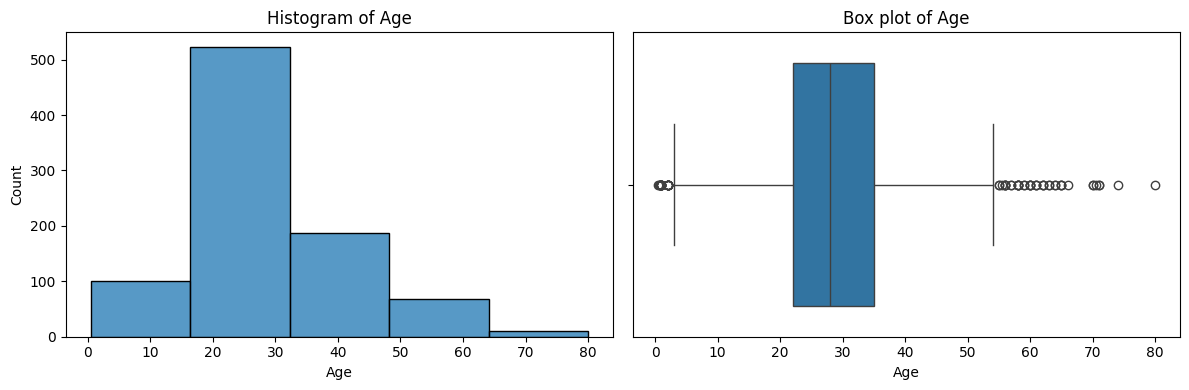

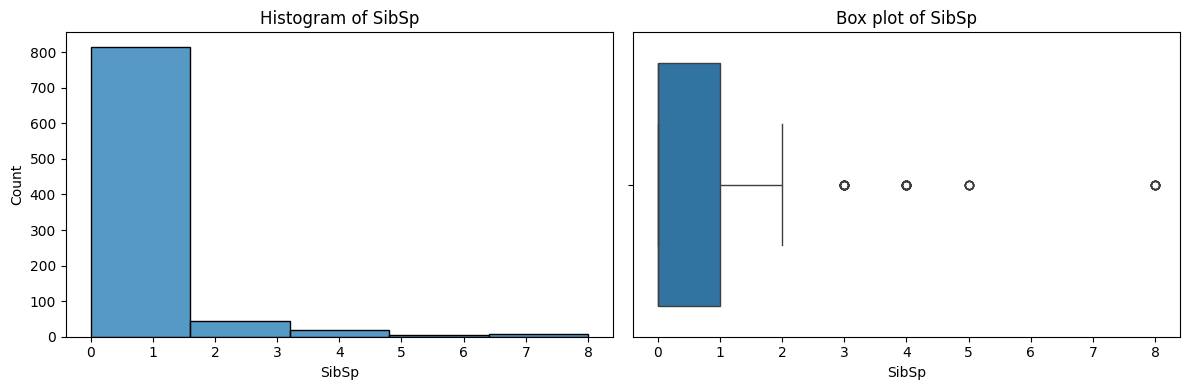

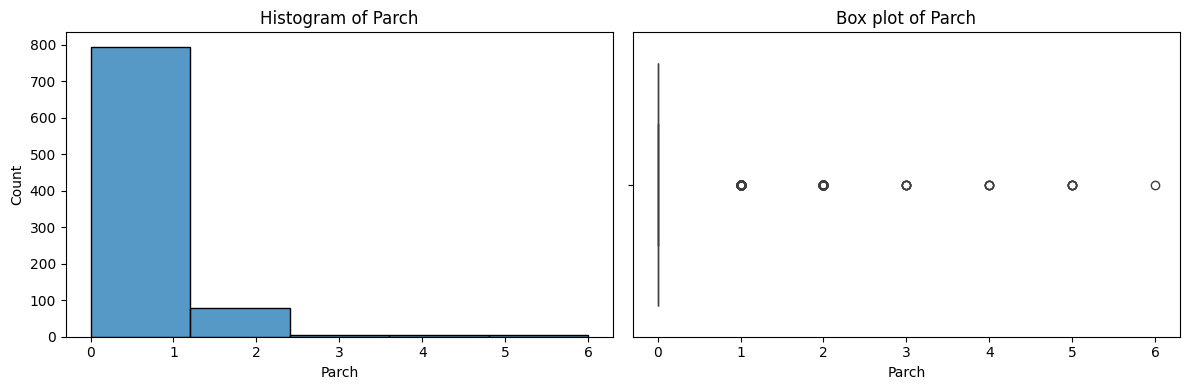

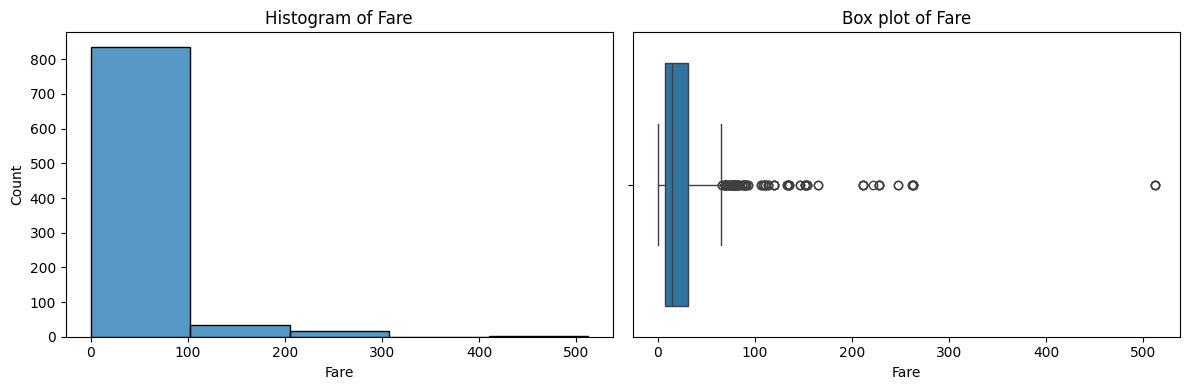

In [29]:
# Use histograms, KDE plots, and box plots for visualizing the distribution of numeric features
for col in quantitative_cols:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    sns.histplot(data=train_data_cleaned, x=col, ax=ax[0], bins=5)
    ax[0].set_title(f"Histogram of {col}")

    sns.boxplot(data=train_data_cleaned, x=col, ax=ax[1])
    ax[1].set_title(f"Box plot of {col}")

    plt.tight_layout()
    plt.show()

**Findings:**

- `Age`:
  - This feature is slightly right-skewed, with most outliers on the right (55-80 year olds) and a few on the left (<10 year olds). This is also supported by the mean (**29.32**) being slightly higher than the median (**28.0**). The values range from **0.42** (less than 1 year old) to **80.0**, with a standard deviation of **12.98**. This shows that passengers aboard had a wide range of ages, but most passengers were between 20-40 years old.
- `SibSp` and `Parch`:
  - Both these features portray the same pattern of being extremely right-skewed, where the vast majority of passengers travelled alone (0-1 relations). There are outliers present in the right side, indicating that some passengers travelled with up to 8 siblings/spouses and 6 parents/children.
- `Fare`:
  - This feature is also severely right-skewed, indicating that most tickets had low prices, which is expected considering most passengers were in 3rd class. The mean ticket fare was **32.097**, while the median was **31.0**. The values had a very wide range, starting from **0.0** (probably stowaways) up to **512.0** (which could indicate the most expensive cabin), with the standard deviation being **49.70**. Outliers in the right side also support the fact that there were significantly fewer passengers booked into 1st and 2nd class, hence the higher ticket prices.

### Categorical Features

In [23]:
categorical_cols = train_data_cleaned.select_dtypes(include=["category"]).columns

# Display frequency tables for categorical features
for col in categorical_cols:
    print(f"Frequency table for {col}:")
    print(train_data_cleaned[col].value_counts())
    print()

Frequency table for Pclass:
Pclass
3    491
1    214
2    184
Name: count, dtype: int64

Frequency table for Sex:
Sex
male      577
female    312
Name: count, dtype: int64

Frequency table for Embarked:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64



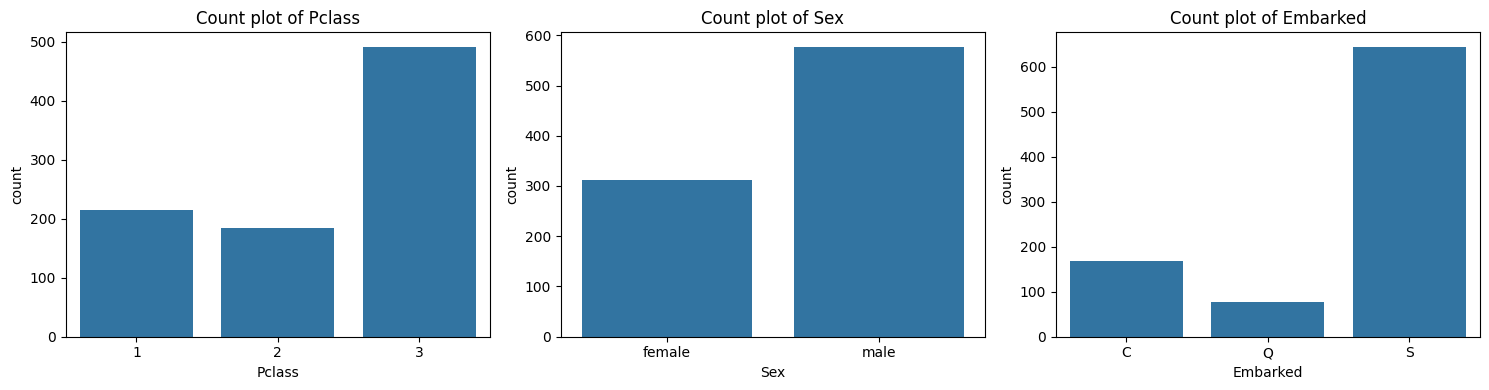

In [28]:
# Use count plots to visualize the distribution of categorical features
fig, ax = plt.subplots(nrows=1, ncols=len(categorical_cols), figsize=(15, 4))

for i, col in enumerate(categorical_cols):
    sns.countplot(data=train_data_cleaned, x=col, ax=ax[i])
    ax[i].set_title(f"Count plot of {col}")
    ax[i].set_xlabel(col)

plt.tight_layout()
plt.show()

**Findings:**

- `Pclass`: This feature is imbalance, with most passengers belonging to 3rd class.
- `Sex`: This feature is imbalanced, with male counts (577) almost double that of females (312).
- `Embarked`: This feature is also imbalanced, with Southampton having significantly more observations (644) than both Queenstown (168) and Cherbourg (77) combined.

## Bivariate Analysis

### Correlation between Numeric Features and Target Variable

In [25]:
# Compute correlations of numeric features with the target variable
for feature in quantitative_cols:
    correlation = train_data_cleaned[feature].corr(train_data_cleaned["Survived"])
    print(f"Correlation between {feature} and Survived: {correlation:.2f}")

Correlation between Age and Survived: -0.07
Correlation between SibSp and Survived: -0.03
Correlation between Parch and Survived: 0.08
Correlation between Fare and Survived: 0.26


**Findings**

- Based on the correlation values, all numeric features exhibited a weak correlation with the target variable `Survived`, which indicates that these features have limited predictive power just on their own and may need further feature engineering.

### Relationship between Categorical Features and Target Variable

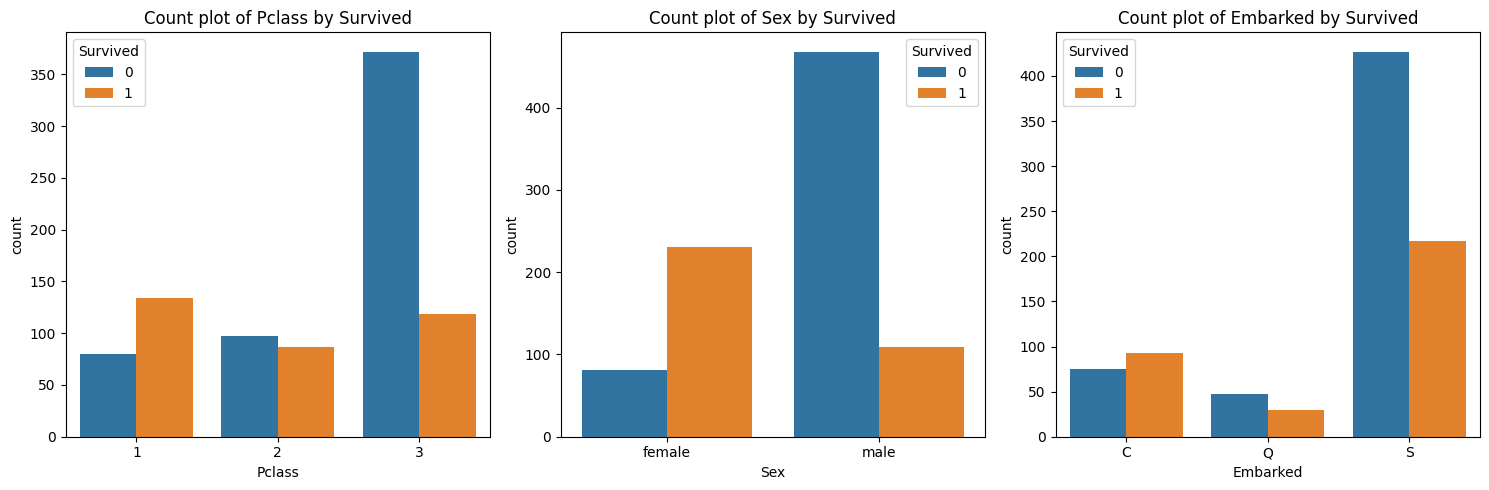

In [26]:
# Visualize the relationship between categorical features and the target variable
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for ax, col in zip(axes, categorical_cols):
    sns.countplot(data=train_data_cleaned, x=col, hue="Survived", ax=ax)
    ax.set_title(f"Count plot of {col} by Survived")

plt.tight_layout()
plt.show()

**Findings:**

- `Pclass`: 3rd class had the largest difference between number of survivors and non-survivors, with the majority of passengers as casualties. 2nd class also had more non-survivors but the difference is significantly smaller. On the other hand, 1st class actually had more survivors than non-survivors. This indicates that higher class passengers had higher chances of survival than lower class ones. 

- `Sex`: There is a pattern where the majority of male passengers were non-survivors but the majority of females were survivors. This indicates that sex also has an impact on survivorship, probably because females and children were the priority to be put in lifeboats.

- `Embarked`: Passengers who embarked from Southampton had the largest difference between number of survivors vs non-survivors, with the majority beging non-surivors. The same pattern is exhibited in the Queenstown class but the difference is smaller. Interestingly, the Cherbourg class actually had slightly more survivors. This indicates that there is a slight relationship between this feature and survival of passengers. 

## Recommendations

- The dataset contains categorical variables (`Pclass`, `Sex`, `Embarked`) and they should be encoded so that they can be fed into the model. Since these features contain low-cardinality, **one-hot encoding** will be used.
- All categorical features exhibit class imbalance and should addressed by using either **class weighting, SMOTE, or resampling techniques**. Additionally, it would be better to focus on metrics such as **Precision, Recall, and F1 Score** because they are better suited to evaluate model performance on imbalanced data. 
- The numeric features (`Age`, `SibSp`, `Parch`, `Fare`) are right-skewed and should be applied with **log transformations** to reduce the skewness of the data.
- The numeric features also exhibit scaling imbalance, thus **scaling techniques such as standardization** should be applied especially if linear models will be used.

# Data Preprocessing